In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import tarfile
import os

# Retriving the data or fetching function 

In [4]:
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

## two functions to extract the data.csv file

In [2]:
path = "datasets\housing"
cwdir = os.getcwd()

def fileextraction():
    res = requests.get("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz")
    if res:
        print("success")
    else:
        print("Not found")
    if not os.path.isdir(path):
        os.makedirs("datasets\Housing")
    tgz_path = os.path.join(cwdir, path)
    os.chdir(tgz_path)
    with open("housing.tgz",'wb') as f:
        f.write(res.content)
    housing_tgz = tarfile.open("housing.tgz")
    housing_tgz.extractall()
    os.chdir(cwdir)

In [ ]:
fileextraction()

# Loading data function 

In [3]:
def load_housing_data(housing_path = path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
df = load_housing_data()

# Quick look at the data 

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.describe(include=[np.object])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [9]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


C:\Users\ARYAN GUPTA\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ARYAN GUPTA\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ARYAN GUPTA\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\ARYAN GUPTA\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: 

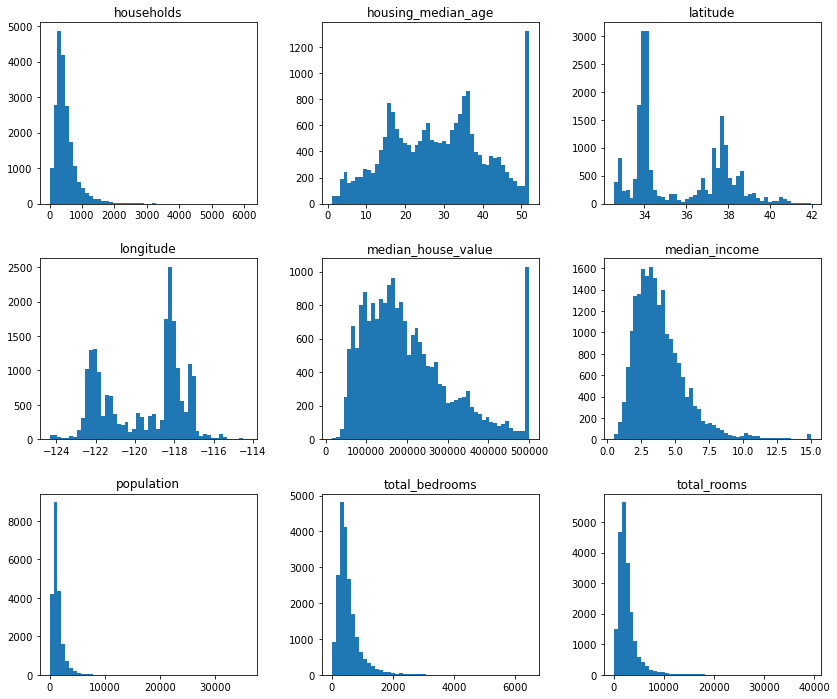

In [12]:
df.hist(bins=50, figsize=(14,12),grid=False)
plt.show()

# Creating the train and test set using Stratified Sampling

In [13]:
from sklearn import model_selection as ms

In [14]:
df["income_cat"] = np.ceil(df["median_income"] / 1.5)
df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)

In [15]:
df['income_cat'].head()

0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


#  Spliting of dataset using Stratified Sampling

In [17]:
splits = ms.StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=42)

In [18]:
for train, test in splits.split(df, df['income_cat']):
    strat_train_set = df.loc[train]
    strat_test_set = df.loc[test]

In [19]:
df['income_cat'].value_counts()/len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [21]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [22]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [23]:
housing = strat_train_set.copy()

# plotting the data  

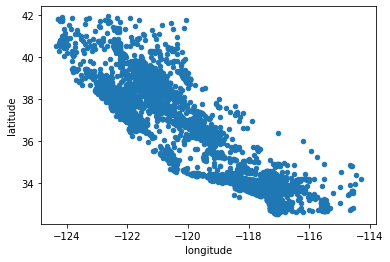

In [24]:
housing.plot(kind = 'scatter', x ='longitude', y= 'latitude')
plt.show()

C:\Users\ARYAN GUPTA\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ARYAN GUPTA\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ARYAN GUPTA\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\ARYAN GUPTA\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: 

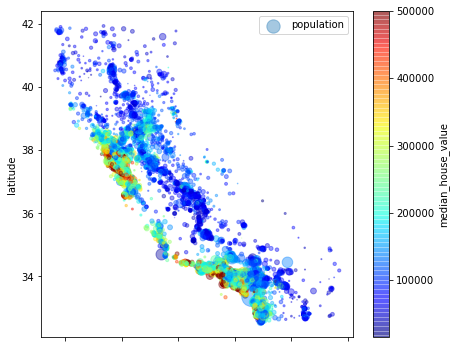

In [25]:
housing.plot(kind = 'scatter', x ='longitude', y= 'latitude',figsize=(7,6),alpha=0.4, s=housing['population']/100 , label = "population", c= "median_house_value",
             cmap=plt.get_cmap("jet"), colorbar = True)
plt.legend()

# Finding the correlation between the each attributes

In [26]:
corr_matrix = housing.corr()

In [27]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

# Another way to check the correlation between the attributes are using the scatter_matrix function of pandas

In [28]:
from pandas.plotting import scatter_matrix

In [29]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

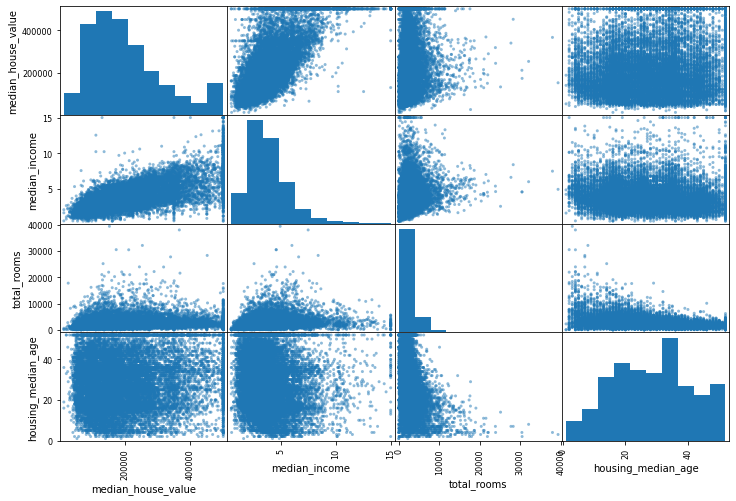

In [30]:
scatter_matrix(housing[attributes],figsize=(12, 8))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

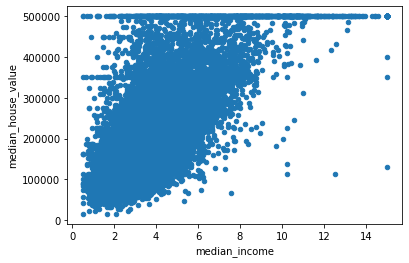

In [31]:
housing.plot(kind='scatter', x='median_income',y='median_house_value')

# Experimenting with different attributes 

In [32]:
housing['rooms_per_households'] = housing['total_rooms']/housing['households']

In [33]:
housing['bedrooms_per_households'] = housing['total_bedrooms']/housing['total_rooms']

In [34]:
housing['population_per_households'] = housing['population']/housing['households']

In [35]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,bedrooms_per_households,population_per_households
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [36]:
corr_matrix = housing.corr()

In [37]:
corr_matrix['median_house_value'].sort_values(ascending= False)

median_house_value           1.000000
median_income                0.687160
rooms_per_households         0.146285
total_rooms                  0.135097
housing_median_age           0.114110
households                   0.064506
total_bedrooms               0.047689
population_per_households   -0.021985
population                  -0.026920
longitude                   -0.047432
latitude                    -0.142724
bedrooms_per_households     -0.259984
Name: median_house_value, dtype: float64

# Data cleaning 

In [38]:
housing = strat_train_set.drop("median_house_value",axis=1)

In [39]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [40]:
housing_label = strat_train_set['median_house_value'].copy()

In [41]:
housing[housing['total_bedrooms'].isnull() == True].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [42]:
housing.dropna(subset = ['total_bedrooms']).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


# SimpleImputer it calculate input strategy of every numeric attribute and put that median at the place of nan values.

In [43]:
from sklearn.impute import SimpleImputer

In [44]:
Sm = SimpleImputer(strategy='median')

In [45]:
housing_num = housing.drop('ocean_proximity',axis=1) 

In [46]:
Sm.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [47]:
Sm.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [48]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [49]:
X = Sm.transform(housing_num)

In [50]:
X = pd.DataFrame(X,columns=housing_num.columns)

In [51]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


# Handling categorical attributes

## there are 2 methods  1: Label encoder and one hot encoder 2: Label Binarizer

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
# intialsing LabelEncoder instance variable 
encoder = LabelEncoder()

In [54]:
housing_cal = housing['ocean_proximity']
housing_encoder = encoder.fit_transform(housing_cal)

In [55]:
housing_encoder

array([0, 0, 4, ..., 1, 0, 3])

In [56]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
encoder  = OneHotEncoder()
housing_1hot = encoder.fit_transform(housing_encoder.reshape(-1,1))

C:\Users\ARYAN GUPTA\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [59]:
housing_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [60]:
housing_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

# 2nd option which perform both LabelEncoder and OneHotEncoder at single run

In [61]:
from sklearn.preprocessing import LabelBinarizer

In [62]:
encoder = LabelBinarizer()
housing_Bina = encoder.fit_transform(housing_cal)

In [63]:
housing_Bina

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

# Custom transformation : this is done to perform those task whose functions are not present in the modules so we write our own code or script to perform those task.

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

In [65]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [66]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return (np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room])
        else:
             return (np.c_[X, rooms_per_household, population_per_household])

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#  Data transformers or transformation to make data useful for analysis by removing misleneous data and making the data perfect as per the requirement.

## Feature Scaling in this we need to scale the numeric attributes to the same scale.

## there are 2 methods for scaling  > min max scaling(Normalization) and standardization

In [67]:
from sklearn.pipeline import Pipeline

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy = 'median')),('attribs_adder', CombinedAttributesAdder()),('std_scalar', StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [70]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

## Full Pipeline for numerical and categorical data  

In [71]:
from sklearn.pipeline import FeatureUnion

In [72]:
num_attributes = list(housing_num)
cat_attributes = ["ocean_proximity"]

In [73]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [74]:
class MyLabelBinarizer(TransformerMixin):
    
    def __init__(self):
        self.encoder = LabelBinarizer()
    
    def fit(self, x, y=None):
        self.encoder.fit(x)
        return self
    
    def transform(self, x, y=None):
        return self.encoder.transform(x)

##  Numerical attribute and categorical attribute pipelines 

In [75]:
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attributes)), ('attribs_adder', CombinedAttributesAdder()), 
                         ('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler())])

cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attributes)),('label_binarizer', MyLabelBinarizer())])

In [76]:
num_pipeline

Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])), ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=True)), ('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True))])

In [77]:
cat_pipeline

Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['ocean_proximity'])), ('label_binarizer', <__main__.MyLabelBinarizer object at 0x0000027961C73588>)])

## Full pipeline or we can say that joining numerical and categorical pipeline

In [78]:
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),("cat_pipeline", cat_pipeline)])

In [79]:
housing_prepared = full_pipeline.fit_transform(housing)

In [80]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [81]:
housing_prepared.shape

(16512, 16)

# Select and Train a model

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lin_reg = LinearRegression()

In [84]:
lin_reg.fit(housing_prepared,housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
some_data = housing.iloc[:5]

In [86]:
some_labels = housing_label.iloc[:5]

In [87]:
some_data_prepared = full_pipeline.transform(some_data)

In [88]:
lin_reg.predict(some_data_prepared)

array([209375.74268037, 315154.78319184, 210238.27856353,  55902.61573275,
       183416.68718873])

In [89]:
some_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [90]:
from sklearn.metrics import mean_squared_error

In [91]:
housing_prediction = lin_reg.predict(housing_prepared)

In [92]:
lin_mse = mean_squared_error(housing_label, housing_prediction)

In [93]:
lin_rmse = np.sqrt(lin_mse)

In [94]:
lin_rmse

68161.22644433199

In [95]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
tree_reg = DecisionTreeRegressor()

In [97]:
tree_reg.fit(housing_prepared,housing_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [98]:
houg_predict = tree_reg.predict(housing_prepared)

In [99]:
tree_mse = mean_squared_error(housing_label,houg_predict)

In [100]:
tree_rmse = np.sqrt(tree_mse)

In [101]:
tree_rmse

0.0

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
scores = cross_val_score(tree_reg, housing_prepared, housing_label,scoring='neg_mean_squared_error',cv=10)

In [104]:
tree_rmse = np.sqrt(-scores)

In [105]:
tree_rmse

array([70539.76833146, 66727.82842355, 68136.5899502 , 69458.60125709,
       68648.0898118 , 74671.7238963 , 71915.1668769 , 71583.91550636,
       76277.82079534, 69453.53280737])

In [106]:
def display_score(scores):
    print("scores : ",scores)
    print("Mean :",scores.mean())
    print("standar deviation",scores.std())

display_score(tree_rmse)

scores :  [70539.76833146 66727.82842355 68136.5899502  69458.60125709
 68648.0898118  74671.7238963  71915.1668769  71583.91550636
 76277.82079534 69453.53280737]
Mean : 70741.30376563562
standar deviation 2807.2679193363315


In [107]:
lin_score = cross_val_score(lin_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv = 10)

In [108]:
lin_rmse_score = np.sqrt(-lin_score)

In [109]:
display_score(lin_rmse_score)

scores :  [66060.65470195 66764.30726969 67721.72734022 74719.28193624
 68058.11572078 70909.35812986 64171.66459204 68075.65317717
 71024.84033989 67300.24394751]
Mean : 68480.58471553595
standar deviation 2845.5843092650825
